## DS 598 Team 1 Training Models

To train models, downloaded cleaned data from our silver layer into Google Drive and mount it

In [1]:
from google.colab import drive
# drive.mount('../content/drive', force_remount=True)
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
# Make sure that you add a shortcut to the folder in My Drive before running this cell
!ls /content/drive/MyDrive/'team1blob'

LA_Air_Quality.parquet		 Silver_Coal_New_England.parquet
la_aqi_monthly_agg.parquet	 Silver_Natural_Gas_LA.parquet
New_England_Air_Quality.parquet  Silver_Natural_Gas_New_England.parquet
Silver_Coal_LA.parquet


In [3]:
import pandas as pd

In [4]:
# read files
ne_air_quality_df = pd.read_parquet('/content/drive/MyDrive/team1blob/New_England_Air_Quality.parquet')
la_air_quality_df = pd.read_parquet('/content/drive/MyDrive/team1blob/LA_Air_Quality.parquet')

ne_natural_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Natural_Gas_New_England.parquet')
la_natural_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Natural_Gas_LA.parquet')

ne_coal_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Coal_New_England.parquet')
la_coal_df = pd.read_parquet('/content/drive/MyDrive/team1blob/Silver_Coal_LA.parquet')

In [5]:
ne_air_quality_df.head()

,coord,list,co,nh3,no,no2,o3,pm10,pm2_5,so2,timestamp,aqi,corrected_timestamp,location,id
0,"{'lon': -71.0589, 'lat': 42.3601}",2,383.85,1.08,0.20,40.44,22.53,7.09,5.43,3.43,1606435200,2,2020-11-27 00:00:00,Boston,Boston_1606435200
1,"{'lon': -71.0589, 'lat': 42.3601}",2,390.53,1.11,0.36,40.44,18.24,7.89,5.95,3.01,1606438800,2,2020-11-27 01:00:00,Boston,Boston_1606438800
2,"{'lon': -71.0589, 'lat': 42.3601}",2,427.25,1.22,1.38,44.55,8.49,10.25,8.02,3.01,1606442400,2,2020-11-27 02:00:00,Boston,Boston_1606442400
3,"{'lon': -71.0589, 'lat': 42.3601}",2,460.63,1.33,5.03,46.61,1.65,12.57,10.23,3.10,1606446000,2,2020-11-27 03:00:00,Boston,Boston_1606446000
4,"{'lon': -71.0589, 'lat': 42.3601}",2,467.30,1.19,8.83,43.53,0.26,13.18,11.09,3.01,1606449600,2,2020-11-27 04:00:00,Boston,Boston_1606449600


In [6]:
la_air_quality_df.head()

,coord,list,co,nh3,no,no2,o3,pm10,pm2_5,so2,timestamp,aqi,corrected_timestamp,location,id
0,"{'lon': -118.2437, 'lat': 34.0522}",1,213.62,0.75,0.71,9.68,77.96,10.01,2.13,2.68,1606435200,1,2020-11-27 00:00:00,Boston,Boston_1606435200
1,"{'lon': -118.2437, 'lat': 34.0522}",2,357.15,2.53,1.03,47.30,34.33,15.27,4.88,4.47,1606438800,2,2020-11-27 01:00:00,Boston,Boston_1606438800
2,"{'lon': -118.2437, 'lat': 34.0522}",2,607.49,5.13,21.68,75.40,0.51,23.32,10.51,5.42,1606442400,2,2020-11-27 02:00:00,Boston,Boston_1606442400
3,"{'lon': -118.2437, 'lat': 34.0522}",2,767.71,6.97,44.70,76.77,0.00,31.73,16.25,5.48,1606446000,2,2020-11-27 03:00:00,Boston,Boston_1606446000
4,"{'lon': -118.2437, 'lat': 34.0522}",3,827.79,7.98,53.64,76.08,0.00,38.25,20.44,5.36,1606449600,3,2020-11-27 04:00:00,Boston,Boston_1606449600


In [7]:
# Manually fix location
la_air_quality_df['location'] = 'LA'
la_air_quality_df.head()

,coord,list,co,nh3,no,no2,o3,pm10,pm2_5,so2,timestamp,aqi,corrected_timestamp,location,id
0,"{'lon': -118.2437, 'lat': 34.0522}",1,213.62,0.75,0.71,9.68,77.96,10.01,2.13,2.68,1606435200,1,2020-11-27 00:00:00,LA,Boston_1606435200
1,"{'lon': -118.2437, 'lat': 34.0522}",2,357.15,2.53,1.03,47.30,34.33,15.27,4.88,4.47,1606438800,2,2020-11-27 01:00:00,LA,Boston_1606438800
2,"{'lon': -118.2437, 'lat': 34.0522}",2,607.49,5.13,21.68,75.40,0.51,23.32,10.51,5.42,1606442400,2,2020-11-27 02:00:00,LA,Boston_1606442400
3,"{'lon': -118.2437, 'lat': 34.0522}",2,767.71,6.97,44.70,76.77,0.00,31.73,16.25,5.48,1606446000,2,2020-11-27 03:00:00,LA,Boston_1606446000
4,"{'lon': -118.2437, 'lat': 34.0522}",3,827.79,7.98,53.64,76.08,0.00,38.25,20.44,5.36,1606449600,3,2020-11-27 04:00:00,LA,Boston_1606449600


Converted aqi to us_aqi through below calculation

In [8]:
import pandas as pd

# Define the breakpoints for each pollutant, including NH3_1hr
breakpoints = {
    'PM2.5': [(0, 12, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200)],
    'PM10': [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200)],
    'O3_8hr': [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200)],
    'SO2': [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200)],
    'CO': [(0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200)],
    'NO2': [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200)],
    'NH3_1hr': [(0, 25, 0, 50), (26, 50, 51, 100), (51, 100, 101, 150), (101, 200, 151, 200)],  # Added NH3_1hr breakpoints
}

# Function to calculate AQI based on the pollutant concentration
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round(((Ihigh - Ilow) / (Chigh - Clow)) * (concentration - Clow) + Ilow)
    return None

# Function to calculate AQI for each row based on multiple pollutants
def calculate_row_aqi(row):
    pollutants = {
        'PM2.5': row['pm2_5'],
        'PM10': row['pm10'],
        'O3_8hr': row['o3'],
        'SO2': row['so2'],
        'CO': row['co'],
        'NO2': row['no2'],
        'NH3_1hr': row['nh3'],  # Added NH3_1hr pollutant
    }
    aqi_values = [
        calculate_aqi(concentration, breakpoints[pollutant])
        for pollutant, concentration in pollutants.items()
        if not pd.isna(concentration) and pollutant in breakpoints
    ]
    # Filter out None values before calling max
    aqi_values = [aqi for aqi in aqi_values if aqi is not None]
    return max(aqi_values) if aqi_values else None

# Ensure 'corrected_timestamp' is in datetime format, handling PeriodDtype
if la_air_quality_df['corrected_timestamp'].dtype == 'period[D]':  # If it's a period dtype
    la_air_quality_df['corrected_timestamp'] = la_air_quality_df['corrected_timestamp'].dt.to_timestamp()
if ne_air_quality_df['corrected_timestamp'].dtype == 'period[D]':  # If it's a period dtype
    ne_air_quality_df['corrected_timestamp'] = ne_air_quality_df['corrected_timestamp'].dt.to_timestamp()

# Convert 'corrected_timestamp' to datetime for both LA and NE DataFrames
la_air_quality_df['corrected_timestamp'] = pd.to_datetime(la_air_quality_df['corrected_timestamp'])
ne_air_quality_df['corrected_timestamp'] = pd.to_datetime(ne_air_quality_df['corrected_timestamp'])

# Apply AQI calculation for LA Air Quality DataFrame
la_air_quality_df['aqi'] = la_air_quality_df.apply(calculate_row_aqi, axis=1)

# Apply AQI calculation for NE Air Quality DataFrame
ne_air_quality_df['aqi'] = ne_air_quality_df.apply(calculate_row_aqi, axis=1)

# Convert corrected_timestamp to date for both LA and NE DataFrames
la_air_quality_df['corrected_date'] = la_air_quality_df['corrected_timestamp'].dt.date
ne_air_quality_df['corrected_date'] = ne_air_quality_df['corrected_timestamp'].dt.date

# Group by date to calculate daily average concentrations and AQI for LA
la_daily_pollutants_df = la_air_quality_df.groupby('corrected_date').agg(
    avg_pm2_5_24hr=('pm2_5', 'mean'),
    avg_pm10_24hr=('pm10', 'mean'),
    avg_co_8hr=('co', 'mean'),
    avg_so2_24hr=('so2', 'mean'),
    avg_no2_1hr=('no2', 'mean'),
    avg_no_1hr=('no', 'mean'),
    avg_o3_8hr=('o3', 'mean'),
    avg_nh3_1hr=('nh3', 'mean'),  # Added average for NH3_1hr
    avg_aqi=('aqi', 'mean')
).reset_index()

# Group by date to calculate daily average concentrations and AQI for NE
ne_daily_pollutants_df = ne_air_quality_df.groupby('corrected_date').agg(
    avg_pm2_5_24hr=('pm2_5', 'mean'),
    avg_pm10_24hr=('pm10', 'mean'),
    avg_co_8hr=('co', 'mean'),
    avg_so2_24hr=('so2', 'mean'),
    avg_no2_1hr=('no2', 'mean'),
    avg_no_1hr=('no', 'mean'),
    avg_o3_8hr=('o3', 'mean'),
    avg_nh3_1hr=('nh3', 'mean'),  # Added average for NH3_1hr
    avg_aqi=('aqi', 'mean')
).reset_index()

# Print samples to verify for LA
print(la_daily_pollutants_df.head())

# Print samples to verify for NE
print(ne_daily_pollutants_df.head())


  corrected_date  avg_pm2_5_24hr  avg_pm10_24hr   avg_co_8hr  avg_so2_24hr  \
0     2020-11-27       38.397917      55.312500  1017.631250     13.527917   
1     2020-11-28       33.931667      48.950417   983.834583     13.602083   
2     2020-11-29       43.962500      62.127500  1068.949583     13.622917   
3     2020-11-30       55.658750      75.745833  1226.941250     19.448750   
4     2020-12-01       66.788750      91.762917  1505.097500     16.415000   

   avg_no2_1hr  avg_no_1hr  avg_o3_8hr  avg_nh3_1hr     avg_aqi  
0    80.514583   90.466667   16.060417     9.423750  104.000000  
1    83.640000   81.473333   19.485000     7.620000  106.291667  
2    93.878750   88.835000   17.460417     9.756250  115.375000  
3   110.415000  104.032083   18.473333    11.650833  129.041667  
4   109.843750  145.147083   14.642083    12.495833  140.458333  
  corrected_date  avg_pm2_5_24hr  avg_pm10_24hr  avg_co_8hr  avg_so2_24hr  \
0     2020-11-27       14.056250      17.771250  609.29958

In [9]:
# convert timestamp to yyy-mm-dd
ne_air_quality_df['corrected_timestamp'] = ne_air_quality_df['corrected_timestamp'].dt.to_period('D')
la_air_quality_df['corrected_timestamp'] = la_air_quality_df['corrected_timestamp'].dt.to_period('D')

In [10]:
# Aggregate daily average of aqi

ne_daily_aqi_df = round(ne_air_quality_df.groupby(['corrected_timestamp'])['aqi'].mean(), 2).reset_index()
la_daily_aqi_df = round(la_air_quality_df.groupby(['corrected_timestamp'])['aqi'].mean(), 2).reset_index()
print(ne_daily_aqi_df.head())
print(la_daily_aqi_df.head())

  corrected_timestamp    aqi
0          2020-11-27  50.58
1          2020-11-28  45.75
2          2020-11-29  36.75
3          2020-11-30  69.04
4          2020-12-01  66.42
  corrected_timestamp     aqi
0          2020-11-27  104.00
1          2020-11-28  106.29
2          2020-11-29  115.38
3          2020-11-30  129.04
4          2020-12-01  140.46


In [ ]:
# Save DataFrames as Parquet files
ne_daily_aqi_df.to_parquet('/content/drive/My Drive/DS598_model_results/ne_daily_aqi_df.parquet', index=False)
la_daily_aqi_df.to_parquet('/content/drive/My Drive/DS598_model_results/la_daily_aqi_df.parquet', index=False)


In [11]:
ne_natural_df['period'] = pd.to_datetime(ne_natural_df['period'])
la_natural_df['period'] = pd.to_datetime(la_natural_df['period'])
ne_natural_df['period'] = ne_natural_df['period'].dt.to_period('D')
la_natural_df['period'] = la_natural_df['period'].dt.to_period('D')
print(ne_natural_df.head())
print(la_natural_df.head())

       period respondent  respondent-name    type-name timezone   value  \
0  2024-11-20       ISNE  ISO New England  Natural Gas  Eastern  175462   
1  2024-11-19       ISNE  ISO New England  Natural Gas  Eastern  175081   
2  2024-11-18       ISNE  ISO New England  Natural Gas  Eastern  169011   
3  2024-11-17       ISNE  ISO New England  Natural Gas  Eastern  156379   
4  2024-11-16       ISNE  ISO New England  Natural Gas  Eastern  153889   

     value-units  
0  megawatthours  
1  megawatthours  
2  megawatthours  
3  megawatthours  
4  megawatthours  
       period respondent                            respondent-name  \
0  2024-11-20       LDWP  Los Angeles Department of Water and Power   
1  2024-11-19       LDWP  Los Angeles Department of Water and Power   
2  2024-11-18       LDWP  Los Angeles Department of Water and Power   
3  2024-11-17       LDWP  Los Angeles Department of Water and Power   
4  2024-11-16       LDWP  Los Angeles Department of Water and Power   

     typ

In [12]:
ne_coal_df['period'] = pd.to_datetime(ne_coal_df['period'])
la_coal_df['period'] = pd.to_datetime(la_coal_df['period'])
ne_coal_df['period'] = ne_coal_df['period'].dt.to_period('D')
la_coal_df['period'] = la_coal_df['period'].dt.to_period('D')
print(ne_coal_df.head())
print(la_coal_df.head())

       period respondent  respondent-name type-name timezone value  \
0  2024-11-19       ISNE  ISO New England      Coal  Eastern    17   
1  2024-11-18       ISNE  ISO New England      Coal  Eastern    16   
2  2024-11-15       ISNE  ISO New England      Coal  Eastern    64   
3  2024-11-14       ISNE  ISO New England      Coal  Eastern    60   
4  2024-11-13       ISNE  ISO New England      Coal  Eastern    92   

     value-units  
0  megawatthours  
1  megawatthours  
2  megawatthours  
3  megawatthours  
4  megawatthours  
       period respondent                            respondent-name type-name  \
0  2024-11-20       LDWP  Los Angeles Department of Water and Power      Coal   
1  2024-11-19       LDWP  Los Angeles Department of Water and Power      Coal   
2  2024-11-18       LDWP  Los Angeles Department of Water and Power      Coal   
3  2024-11-16       LDWP  Los Angeles Department of Water and Power      Coal   
4  2024-11-15       LDWP  Los Angeles Department of Water an

In [ ]:
# Merge data
ne_natural_aqi_df = ne_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(ne_natural_df, on='period', how='left')
print(ne_natural_aqi_df.head())

la_natural_aqi_df = la_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(la_natural_df, on='period', how='left')
print(la_natural_aqi_df.head())

ne_coal_aqi_df = ne_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(ne_coal_df, on='period', how='left')
print(ne_coal_aqi_df.head())

la_coal_aqi_df = la_daily_aqi_df.rename(columns={'corrected_timestamp': 'period'}).merge(la_coal_df, on='period', how='left')
print(la_coal_aqi_df.head())

       period    aqi respondent  respondent-name    type-name timezone  \
0  2020-11-27  50.58       ISNE  ISO New England  Natural Gas  Eastern   
1  2020-11-28  45.75       ISNE  ISO New England  Natural Gas  Eastern   
2  2020-11-29  36.75       ISNE  ISO New England  Natural Gas  Eastern   
3  2020-11-30  69.04       ISNE  ISO New England  Natural Gas  Eastern   
4  2020-12-01  66.42       ISNE  ISO New England  Natural Gas  Eastern   

    value    value-units  
0   90918  megawatthours  
1   88848  megawatthours  
2   82592  megawatthours  
3  108252  megawatthours  
4   85534  megawatthours  
       period     aqi respondent                            respondent-name  \
0  2020-11-27  104.00       LDWP  Los Angeles Department of Water and Power   
1  2020-11-28  106.29       LDWP  Los Angeles Department of Water and Power   
2  2020-11-29  115.38       LDWP  Los Angeles Department of Water and Power   
3  2020-11-30  129.04       LDWP  Los Angeles Department of Water and Power  

In [ ]:
print(len(ne_natural_aqi_df))
print(len(la_natural_aqi_df))
print(len(ne_coal_aqi_df))
print(len(la_natural_aqi_df))

1434
1434
1434
1434


In [ ]:
ne_mergred_df = ne_natural_aqi_df.merge(ne_coal_aqi_df, on=['period', 'aqi', 'value-units', 'respondent-name', 'timezone', 'respondent'], how='left')
ne_mergred_df = ne_mergred_df.rename(columns={'value_x': 'natural_gas_value', 'value_y': 'coal_value'})
ne_mergred_df.head()

,period,aqi,respondent,respondent-name,type-name_x,timezone,natural_gas_value,value-units,type-name_y,coal_value
0,2020-11-27,50.58,ISNE,ISO New England,Natural Gas,Eastern,90918,megawatthours,Coal,139
1,2020-11-28,45.75,ISNE,ISO New England,Natural Gas,Eastern,88848,megawatthours,Coal,15
2,2020-11-29,36.75,ISNE,ISO New England,Natural Gas,Eastern,82592,megawatthours,Coal,15
3,2020-11-30,69.04,ISNE,ISO New England,Natural Gas,Eastern,108252,megawatthours,Coal,76
4,2020-12-01,66.42,ISNE,ISO New England,Natural Gas,Eastern,85534,megawatthours,Coal,11


In [ ]:
la_mergred_df = la_natural_aqi_df.merge(la_coal_aqi_df, on=['period', 'aqi', 'value-units', 'respondent-name', 'timezone', 'respondent'], how='left')
la_mergred_df = la_mergred_df.rename(columns={'value_x': 'natural_gas_value', 'value_y': 'coal_value'})
la_mergred_df.head(40)

,period,aqi,respondent,respondent-name,type-name_x,timezone,natural_gas_value,value-units,type-name_y,coal_value
0,2020-11-27,104.00,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,21804,megawatthours,Coal,16935
1,2020-11-28,106.29,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,21487,megawatthours,Coal,16914
2,2020-11-29,115.38,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,23278,megawatthours,Coal,16491
3,2020-11-30,129.04,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,21965,megawatthours,Coal,18664
4,2020-12-01,140.46,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,17977,megawatthours,Coal,31527
5,2020-12-02,141.83,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,19792,megawatthours,Coal,30093
6,2020-12-03,130.96,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,23241,megawatthours,Coal,24148
7,2020-12-04,126.88,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,22063,megawatthours,Coal,28842
8,2020-12-05,125.08,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,23882,megawatthours,Coal,21322
9,2020-12-06,149.96,LDWP,Los Angeles Department of Water and Power,Natural Gas,Pacific,25196,megawatthours,Coal,18984


## VectorAutoRegression Model

A time series model that captures relationships among multiple variables and their own lagged values.

**Parameter 'order' to set**

p: The lag order, representing the number of lag observations incorporated in the model.

d: Degree of differencing, denoting the number of times raw observations undergo differencing.

q: Order of moving average, indicating the size of the moving average window.

References

- https://www.linkedin.com/pulse/time-series-episode-3-arima-forecasting-exogenous-vasilis-kalyvas-c09kf/
- https://buse-koseoglu13.medium.com/guide-to-time-series-analysis-with-python-4-arima-and-sarima-d62bcdcfb64a
- https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
- https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/

Vector Autoregressive Model

https://www.analyticsvidhya.com/blog/2018/09/multivariate-time-series-guide-forecasting-modeling-python-codes/

In [ ]:
# ne_mergred_df['period'] = pd.to_datetime(ne_mergred_df.period, format = '%d/%m/%Y %H.%M.%S')
var_ne_data = ne_mergred_df.drop(['period'], axis=1)
var_ne_data.index = ne_mergred_df.period
var_ne_data = var_ne_data[['aqi', 'natural_gas_value', 'coal_value']]

var_la_data = la_mergred_df.drop(['period'], axis=1)
var_la_data.index = la_mergred_df.period
var_la_data = var_la_data[['aqi', 'natural_gas_value', 'coal_value']]

print(var_ne_data.head())
print(var_la_data.head())

              aqi natural_gas_value coal_value
period                                        
2020-11-27  50.58             90918        139
2020-11-28  45.75             88848         15
2020-11-29  36.75             82592         15
2020-11-30  69.04            108252         76
2020-12-01  66.42             85534         11
               aqi natural_gas_value coal_value
period                                         
2020-11-27  104.00             21804      16935
2020-11-28  106.29             21487      16914
2020-11-29  115.38             23278      16491
2020-11-30  129.04             21965      18664
2020-12-01  140.46             17977      31527


In [ ]:
from statsmodels.tsa.vector_ar.var_model import VAR
import numpy as np

In [ ]:
# drop na and make sure datatype is integer
var_ne_data = var_ne_data.dropna()
var_ne_data['natural_gas_value'] = var_ne_data['natural_gas_value'].astype(int)
var_ne_data['coal_value'] = var_ne_data['coal_value'].astype(int)

var_la_data = var_la_data.dropna()
var_la_data['natural_gas_value'] = var_la_data['natural_gas_value'].astype(int)
var_la_data['coal_value'] = var_la_data['coal_value'].astype(int)

print(var_ne_data.info())
print(var_la_data.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1031 entries, 2020-11-27 to 2024-11-02
Freq: D
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aqi                1031 non-null   float64
 1   natural_gas_value  1031 non-null   int64  
 2   coal_value         1031 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 32.2 KB
None
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1393 entries, 2020-11-27 to 2024-11-02
Freq: D
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aqi                1393 non-null   float64
 1   natural_gas_value  1393 non-null   int64  
 2   coal_value         1393 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 43.5 KB
None


<ipython-input-63-69e9c819b7be>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_ne_data['natural_gas_value'] = var_ne_data['natural_gas_value'].astype(int)
<ipython-input-63-69e9c819b7be>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_ne_data['coal_value'] = var_ne_data['coal_value'].astype(int)
<ipython-input-63-69e9c819b7be>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

In [ ]:
# split into train and test dataset. Ratio is 8:2.
var_ne_train = var_ne_data[:int(0.8*(len(var_ne_data)))]
var_ne_test = var_ne_data[int(0.8*(len(var_ne_data))):]

var_la_train = var_la_data[:int(0.8*(len(var_la_data)))]
var_la_test = var_la_data[int(0.8*(len(var_la_data))):]

In [ ]:
# Due to more na values in NE dataset. NE and LA datasets' sizes differ.
print(var_ne_train.info())
print(var_la_train.info())

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 824 entries, 2020-11-27 to 2023-12-25
Freq: D
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aqi                824 non-null    float64
 1   natural_gas_value  824 non-null    int64  
 2   coal_value         824 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 25.8 KB
None
<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1114 entries, 2020-11-27 to 2023-12-29
Freq: D
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   aqi                1114 non-null   float64
 1   natural_gas_value  1114 non-null   int64  
 2   coal_value         1114 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 34.8 KB
None


In [ ]:
# fit the models
var_ne_model = VAR(np.asarray(var_ne_train))
var_ne_model_fit = var_ne_model.fit()

var_la_model = VAR(np.asarray(var_la_train))
var_la_model_fit = var_la_model.fit()

In [ ]:
# check the best number of lags. select the number with lowest AIC.
ne_lags = var_ne_model.select_order(maxlags=12)
print(ne_lags.summary())

la_lags = var_la_model.select_order(maxlags=12)
print(la_lags.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        44.00       44.02   1.285e+19       44.01
1        41.30      41.37*   8.617e+17       41.32
2        41.26       41.38   8.324e+17       41.31
3        41.23       41.40   8.021e+17      41.29*
4        41.24       41.46   8.095e+17       41.32
5        41.23       41.51   8.083e+17       41.34
6        41.21       41.54   7.924e+17       41.34
7       41.20*       41.58  7.805e+17*       41.35
8        41.21       41.64   7.897e+17       41.38
9        41.22       41.71   7.998e+17       41.41
10       41.23       41.77   8.047e+17       41.44
11       41.22       41.81   7.985e+17       41.45
12       41.24       41.88   8.106e+17       41.48
--------------------------------------------------
 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
-------------------------------

In [ ]:
var_ne_model_fit = var_ne_model.fit(7)
print(var_ne_model_fit.summary())

var_la_model_fit = var_la_model.fit(6)
print(var_la_model_fit.summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 15, Dec, 2024
Time:                     21:14:33
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    41.5782
Nobs:                     817.000    HQIC:                   41.3439
Log likelihood:          -20241.2    FPE:                7.79993e+17
AIC:                      41.1980    Det(Omega_mle):     7.20229e+17
--------------------------------------------------------------------
Results for equation y1
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        36.692353         6.653885            5.514           0.000
L1.y1         0.222667         0.035339            6.301           0.000
L1.y2         0.000070         0.000039            1.815           0.069
L1.y3         0.000431

In [ ]:
ne_lag_order = var_ne_model_fit.k_ar
la_lag_order = var_la_model_fit.k_ar
print(ne_lag_order)
print(la_lag_order)

7
6


In [ ]:
# set inputs
ne_forecast_input = var_ne_test.values
la_forecast_input = var_la_test.values

In [ ]:
# forecast with the model
ne_fc = var_ne_model_fit.forecast(y=ne_forecast_input, steps=len(var_ne_test))
ne_df_forecast = pd.DataFrame(ne_fc, index=var_ne_test.index, columns=var_ne_test.columns)

la_fc = var_la_model_fit.forecast(y=la_forecast_input, steps=len(var_la_test))
la_df_forecast = pd.DataFrame(la_fc, index=var_la_test.index, columns=var_la_test.columns)

print(ne_df_forecast.head())
print(la_df_forecast.head())

                  aqi  natural_gas_value  coal_value
period                                              
2023-12-26  77.741855      174977.457547   41.380623
2023-12-27  74.485869      174571.158682  -38.468751
2023-12-28  71.682451      179116.529994  -48.439015
2023-12-29  76.210251      181621.978063    2.041976
2023-12-30  78.848262      178402.416931   10.592100
                  aqi  natural_gas_value    coal_value
period                                                
2023-12-30  73.880647       14271.529945  11684.054566
2023-12-31  88.864501       14736.759090  12163.238969
2024-01-01  93.076706       16122.327095  12806.511558
2024-01-02  95.168078       16257.495803  13286.935569
2024-01-03  98.270598       17074.946681  14170.839859


In [ ]:
import matplotlib.pyplot as plt

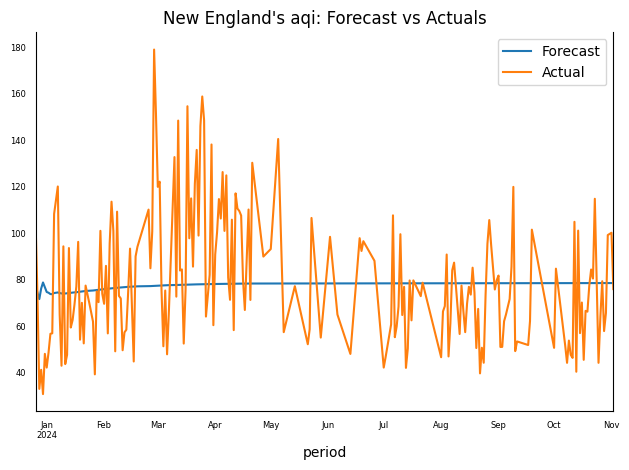

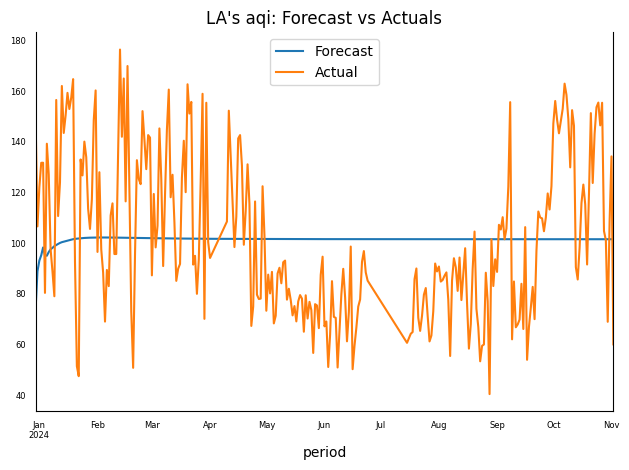

In [ ]:
fig, ax = plt.subplots()

ne_df_forecast['aqi'].plot(legend=True, ax=ax, label='Forecast').autoscale(axis='x', tight=True)
var_ne_test['aqi'].plot(legend=True, ax=ax, label='Actual')

ax.set_title("New England's aqi: Forecast vs Actuals")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.spines["top"].set_alpha(0)
ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

fig, ax = plt.subplots()

la_df_forecast['aqi'].plot(legend=True, ax=ax, label='Forecast').autoscale(axis='x', tight=True)
var_la_test['aqi'].plot(legend=True, ax=ax, label='Actual')

ax.set_title("LA's aqi: Forecast vs Actuals")

ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

ax.spines["top"].set_alpha(0)
ax.tick_params(labelsize=6)

plt.tight_layout()
plt.show()

In [ ]:
from re import X
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

ne_data = var_ne_data
la_data = var_la_data

X_ne = ne_data[['natural_gas_value', 'coal_value']]
y_ne = ne_data['aqi']

X_la = la_data[['natural_gas_value', 'coal_value']]
y_la = la_data['aqi']

X_ne_train, X_ne_test, y_ne_train, y_ne_test = train_test_split(X_ne, y_ne, test_size=0.2, shuffle=False)
X_la_train, X_la_test, y_la_train, y_la_test = train_test_split(X_la, y_la, test_size=0.2, shuffle=False)

In [ ]:
def plot_results(results_df, model_name, location):
    plt.figure(figsize=(10, 6))
    results_df['Actual'].plot(label='Actual', color='blue')
    results_df['Predicted'].plot(label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('AQI')
    plt.title(f"Actual vs {model_name}'s Predicted {location} AQI")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

## RandomForestRegressor

An ensemble learning method that builds multiple decision trees and averages their results for regresion tasks

---- NE Model ----
MSE: 884.6843782565701, R²: -0.1516326884659538


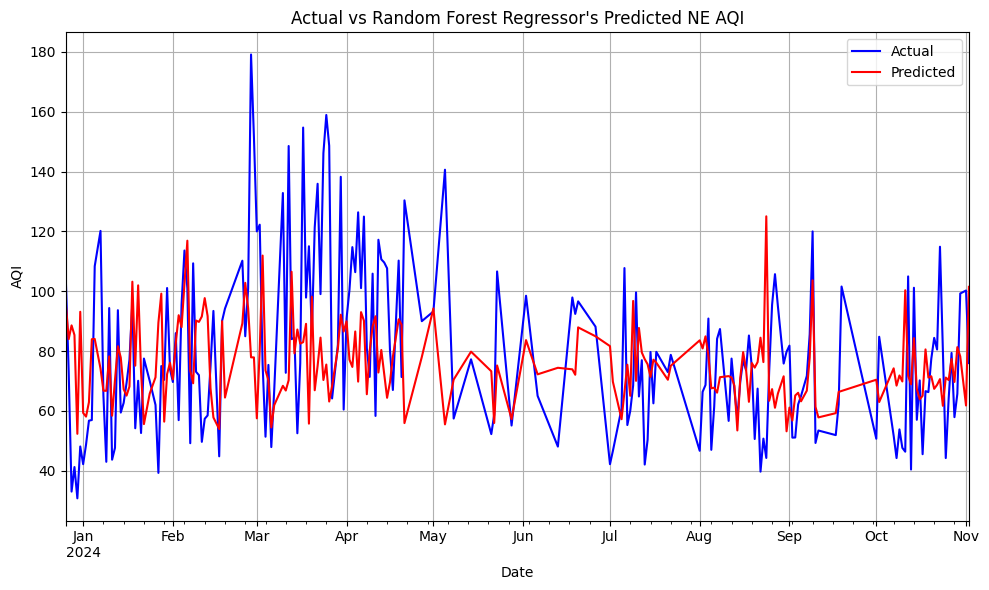

---- LA Model ----
MSE: 1175.8107549398921, R²: -0.2099244671261482


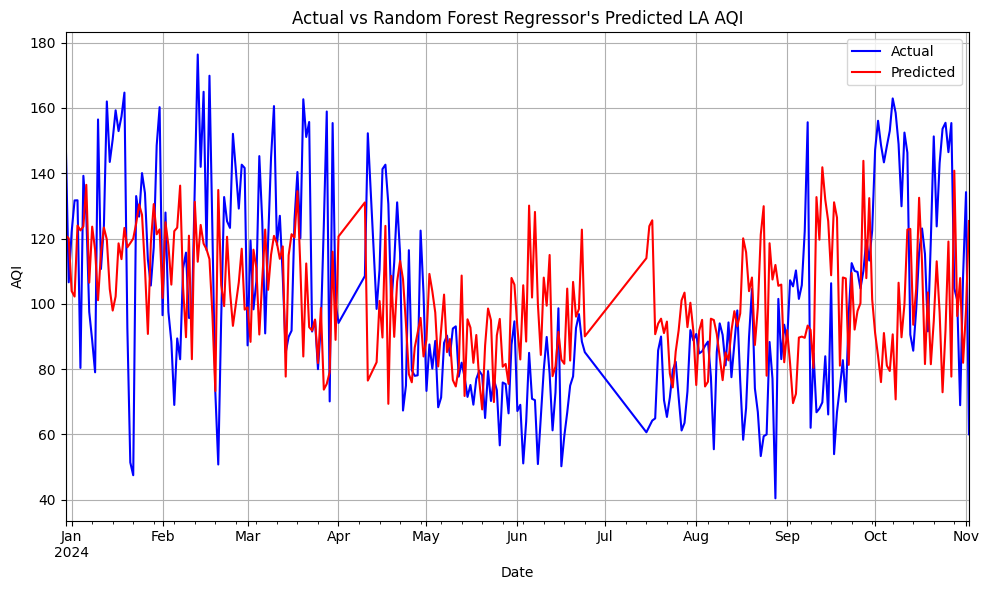

In [ ]:
from sklearn.ensemble import RandomForestRegressor

def train_and_evaluate_random_forest(X_train, y_train, X_test, y_test, location):
    # create and train model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # make predictions and calculate metrics
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    # make a results df and plot the results
    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'Random Forest Regressor', location)

    return model, results_df

# get predicions for each NE and LA
rfr_ne_model, rfr_ne_results_df = train_and_evaluate_random_forest(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 'NE')
rfr_la_model, rfr_la_results_df = train_and_evaluate_random_forest(X_la_train, y_la_train, X_la_test, y_la_test, 'LA')

## XGBoostRegressor
An efficient gradient boosting algorithm optimized for speed and performance

---- NE Model ----
MSE: 549.1488440495528, R²: -0.15721748063421237


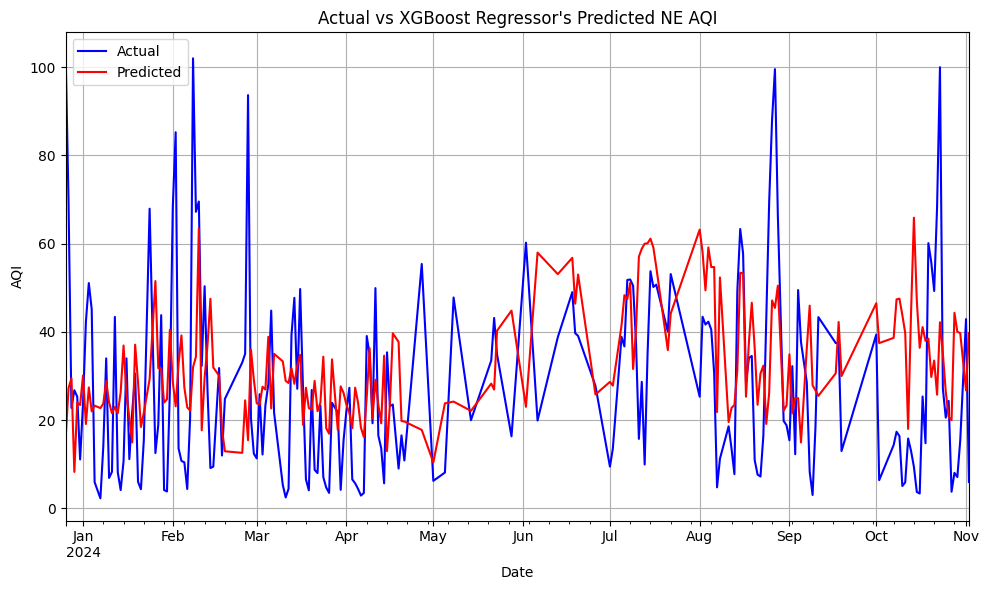

---- LA Model ----
MSE: 1781.3323022132352, R²: -0.31308930615249486


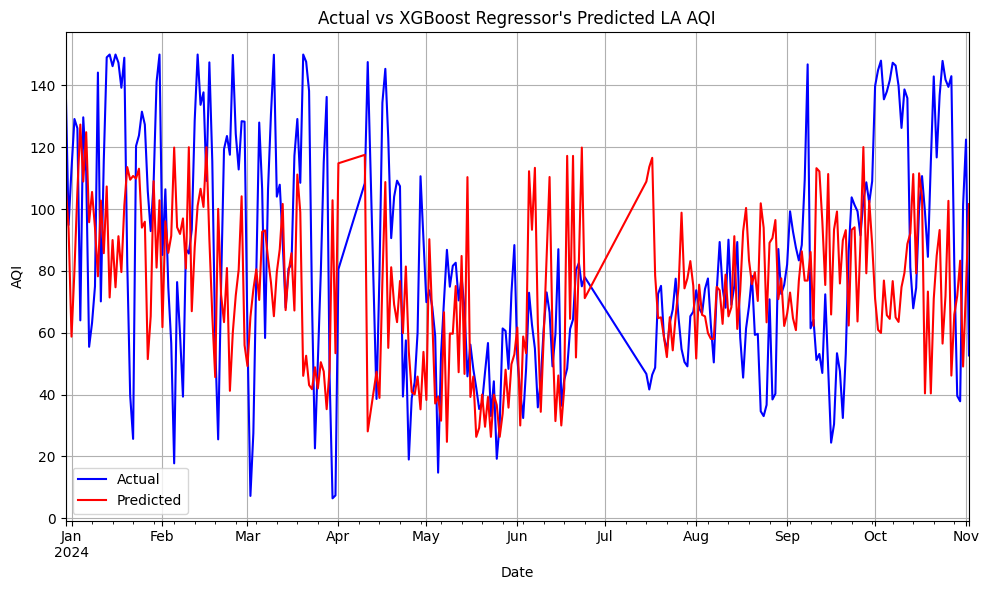

In [ ]:
from xgboost import XGBRegressor

def train_and_evaluate_xgboost(X_train, y_train, X_test, y_test, location):
    model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'XGBoost Regressor', location)

    return model, results_df

xgb_ne_model, xgb_ne_results_df = train_and_evaluate_xgboost(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 'NE')
xgb_la_model, xgb_la_results_df = train_and_evaluate_xgboost(X_la_train, y_la_train, X_la_test, y_la_test, 'LA')

## Support Vector Regressor(SVR)
A regression variant of Support Vector Machines that finds a hyperplane fitting the data within a tolerance margin

---- NE Model ----
MSE: 446.10698665023847, R²: 0.05992189771754186


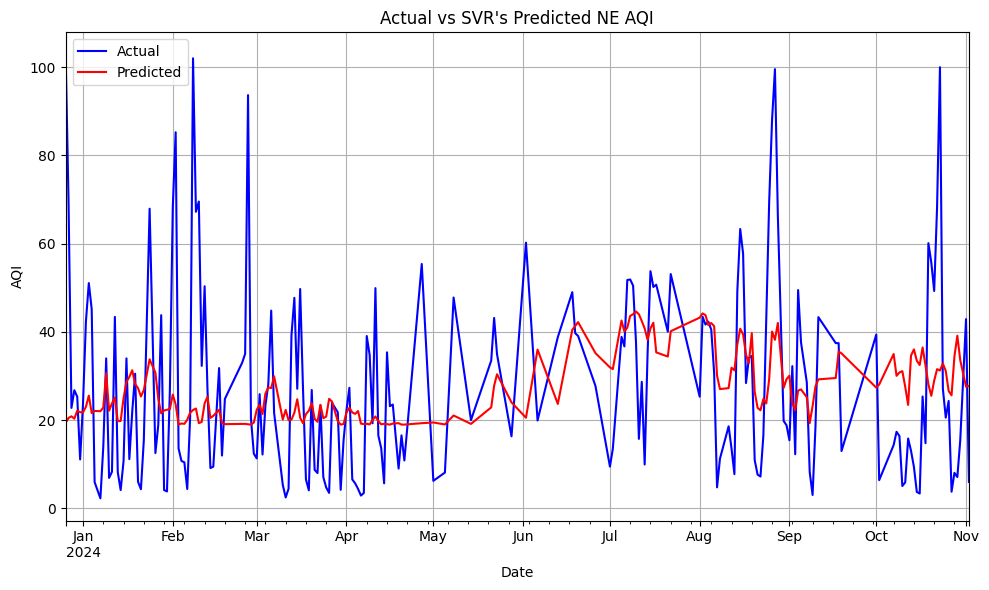

---- LA Model ----
MSE: 1626.4375855252736, R²: -0.19891038748034262


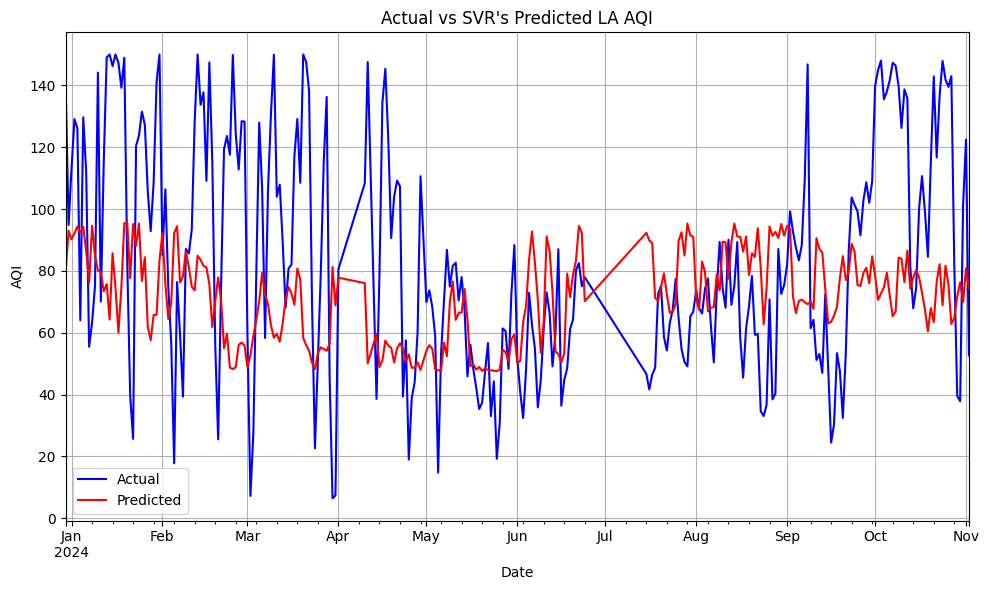

In [ ]:
from sklearn.svm import SVR

def train_and_evaluate_svr(X_train, y_train, X_test, y_test, location):
    model = SVR(kernel='rbf', C=1.0, epsilon=0.1)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'SVR', location)

    return model, results_df

svr_ne_model, svr_ne_results_df = train_and_evaluate_svr(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 'NE')
svr_la_model, svr_la_results_df = train_and_evaluate_svr(X_la_train, y_la_train, X_la_test, y_la_test, 'LA')

## Multi-Layer Perceptron
A neural network model with multiple layers of perceptrons for regression tasks.

---- NE Model ----
MSE: 483.8390039378829, R²: -0.019590515825687493


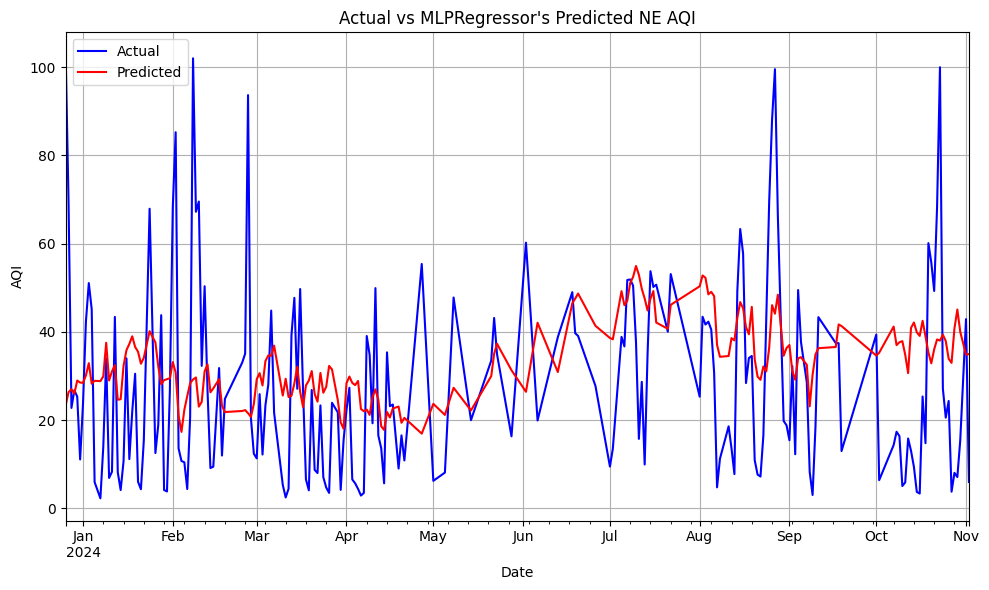

---- LA Model ----
MSE: 2723.4236154378204, R²: -1.0075414458668974


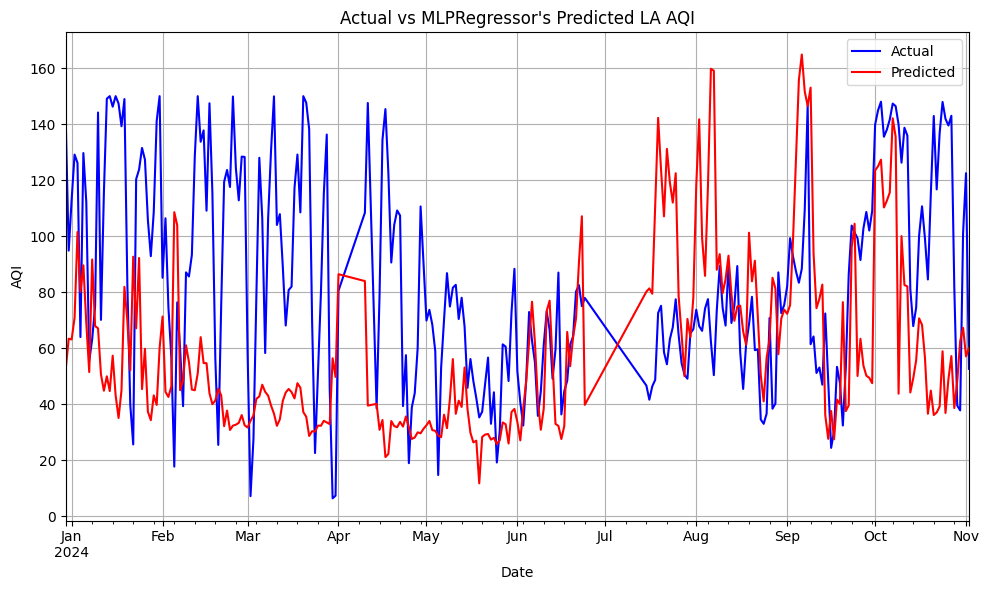

In [ ]:
from sklearn.neural_network import MLPRegressor

def train_and_evaluate_mlp(X_train, y_train, X_test, y_test, location):
    model = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'MLPRegressor', location)

    return model, results_df

mlp_ne_model, mlp_ne_results_df = train_and_evaluate_mlp(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 'NE')
mlp_la_model, mlp_la_results_df = train_and_evaluate_mlp(X_la_train, y_la_train, X_la_test, y_la_test, 'LA')

## LGBMRegressor
efficient implementation of gradient boosting that is highly optimized for speed and performance, especially with larger datasets.

In [ ]:
! pip install dask[dataframe]

INFO: pip is looking at multiple versions of dask-expr to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.2/243.2 kB 8.3 MB/s eta 0:00:00


[LightGBM] [Info] Total Bins 509
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 2
[LightGBM] [Info] Start training from score 29.720910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
---- NE Model ----
MSE: 529.6332427311962, R²: -0.11609239180737974


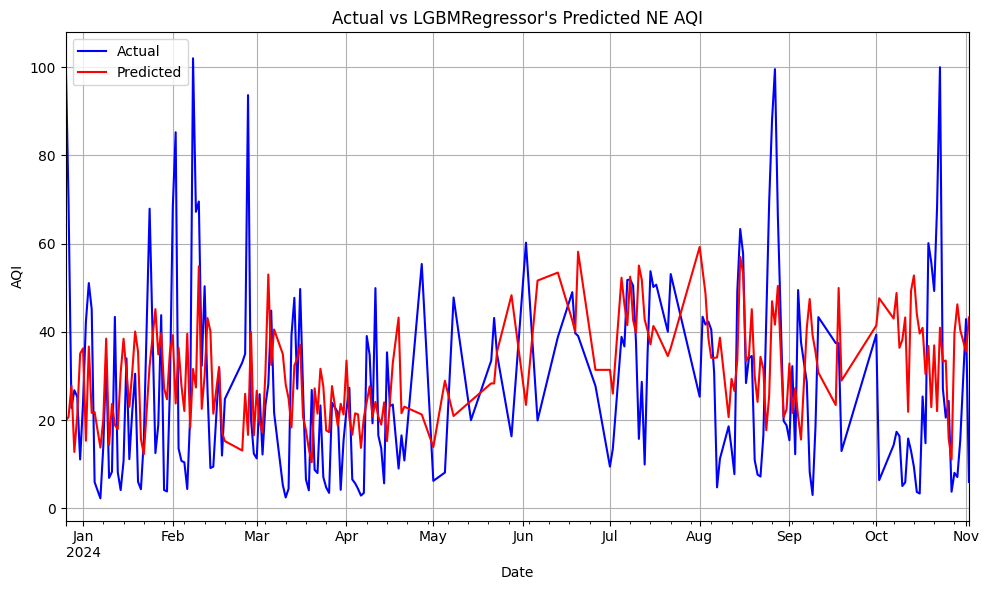

[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 1114, number of used features: 2
[LightGBM] [Info] Start training from score 81.360916
---- LA Model ----
MSE: 1733.0385823434217, R²: -0.27749012735997725


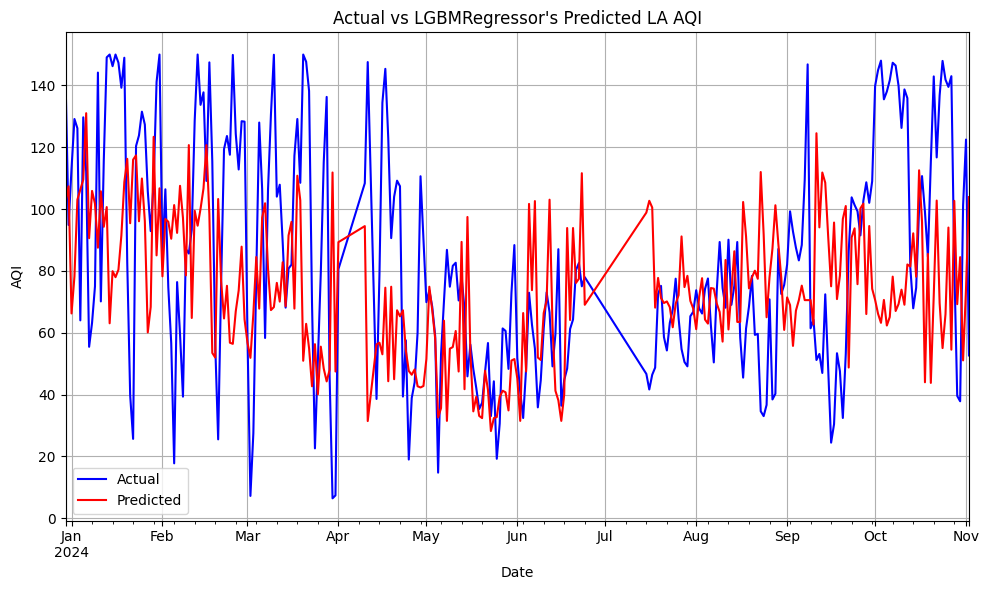

In [ ]:
from lightgbm import LGBMRegressor

def train_and_evaluate_lgbm(X_train, y_train, X_test, y_test, alpha, location):
    model = LGBMRegressor(n_estimators=100, learning_rate=alpha, force_col_wise=True)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'LGBMRegressor', location)

    return model, results_df

lgbm_ne_model, lgbm_ne_results_df = train_and_evaluate_lgbm(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 0.1, 'NE')
lgbm_la_model, lgbm_la_results_df = train_and_evaluate_lgbm(X_la_train, y_la_train, X_la_test, y_la_test, 0.05, 'LA')

## CatBoost
Another gradient boosting model, designed specifically for categorical data.

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


---- NE Model ----
MSE: 478.9261803581404, R²: -0.009237757393518287


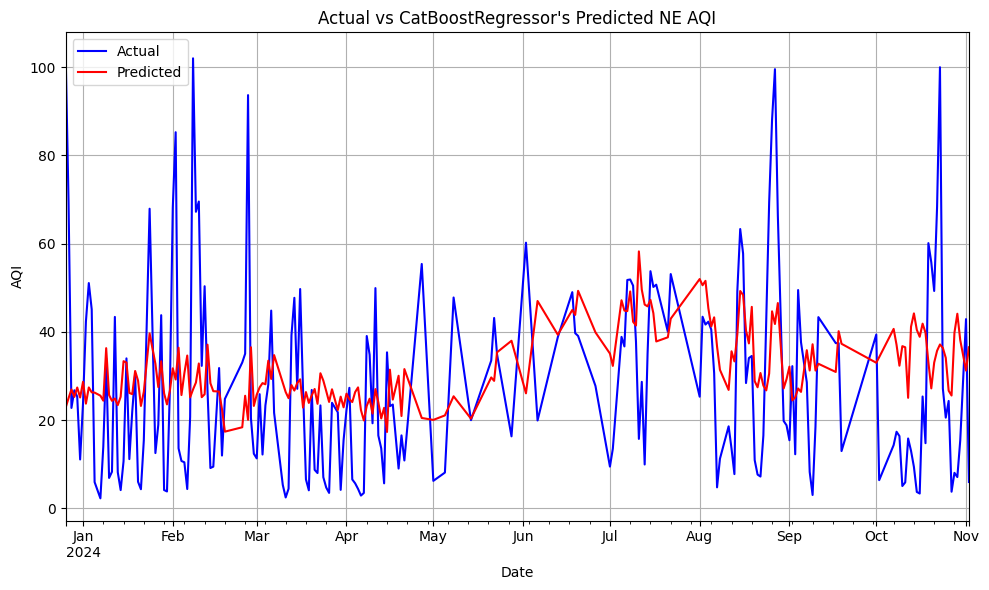

---- LA Model ----
MSE: 1568.2919685022048, R²: -0.15604899221020263


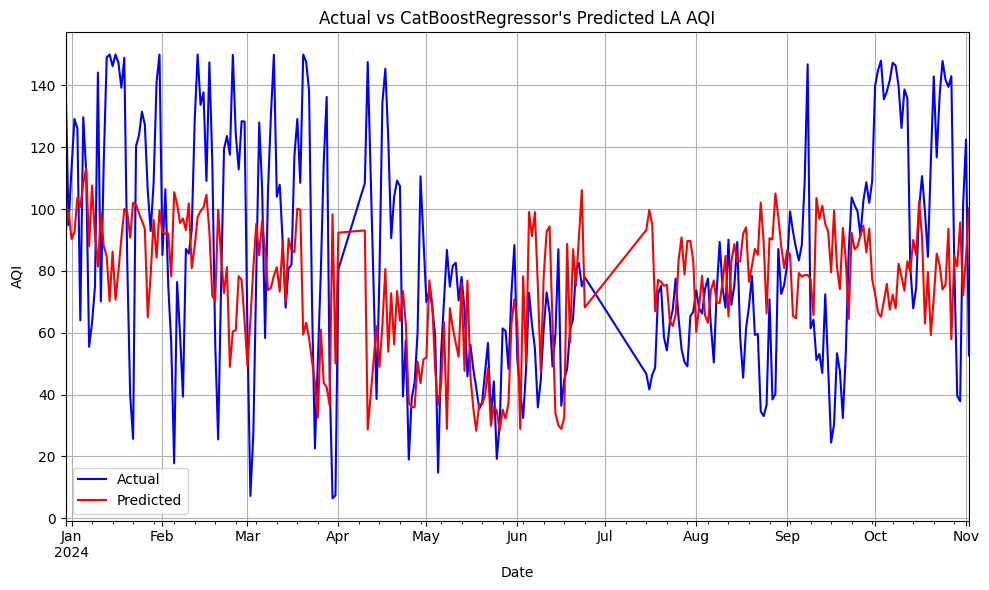

In [ ]:
import numpy
from catboost import CatBoostRegressor

def train_and_evaluate_catboost(X_train, y_train, X_test, y_test, location):
    model = CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'CatBoostRegressor', location)

    return model, results_df

catb_ne_model, catb_ne_results_df = train_and_evaluate_catboost(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 'NE')
catb_la_model, catb_la_results_df = train_and_evaluate_catboost(X_la_train, y_la_train, X_la_test, y_la_test, 'LA')

## ElasticNet
A combination of Ridge and Lasso Regressions

---- NE Model ----
MSE: 464.73697978087847, R²: 0.020663044769967387


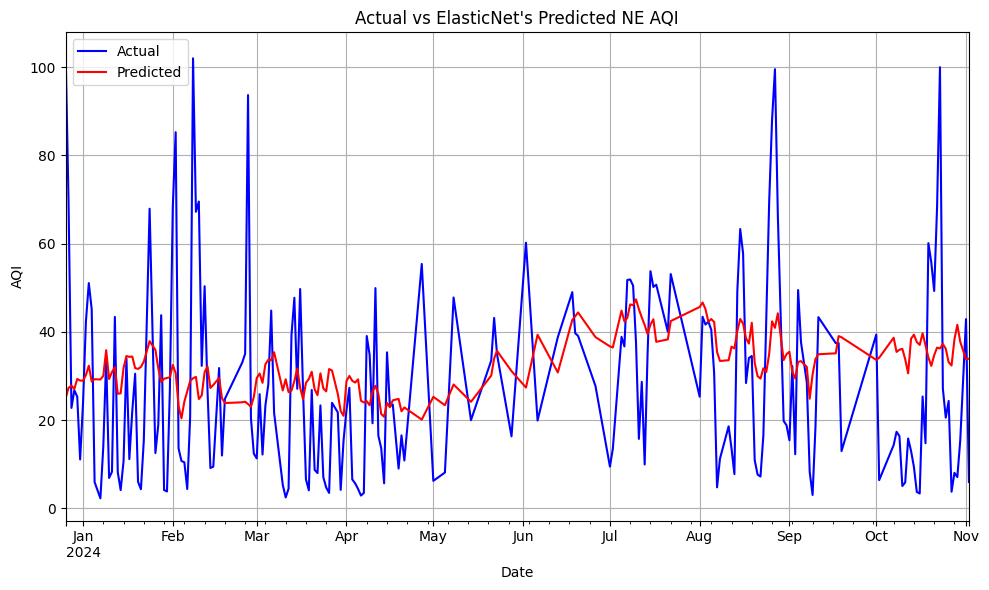

---- LA Model ----
MSE: 1370.5286787345717, R²: -0.010269981398591144


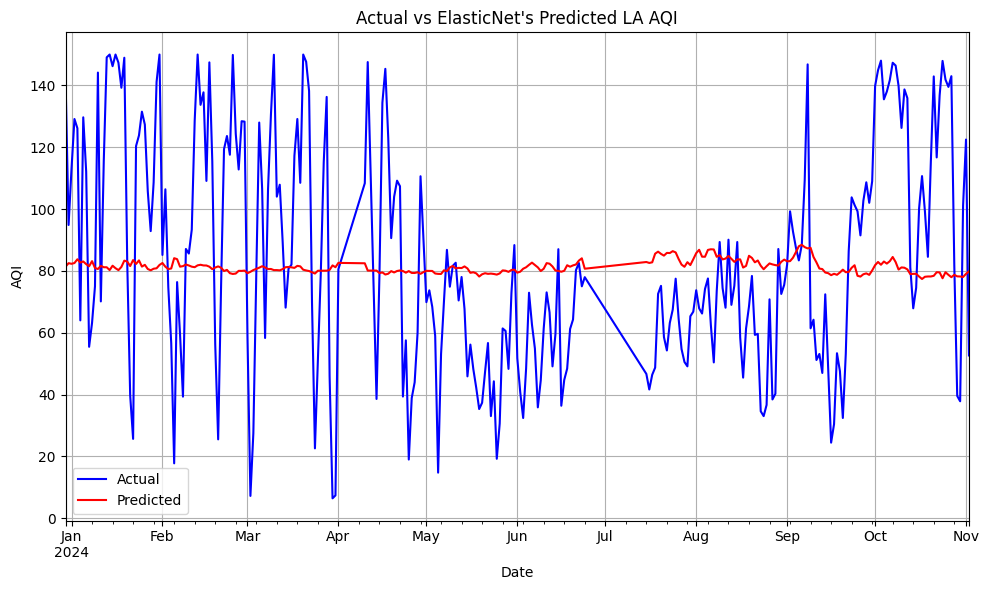

In [ ]:
from sklearn.linear_model import ElasticNet

def train_and_evaluate_elastic_net(X_train, y_train, X_test, y_test, alpha, l1_ratio, location):
    model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)

    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'ElasticNet', location)

    return model, results_df

elastic_ne_model, elastic_ne_results_df = train_and_evaluate_elastic_net(X_ne_train, y_ne_train, X_ne_test, y_ne_test, 0.1, 0.5, 'NE')
elastic_la_model, elastic_la_results_df = train_and_evaluate_elastic_net(X_la_train, y_la_train, X_la_test, y_la_test, 0.1, 0.5, 'LA')

## AdaBoost
An ensemble model that combines weak learners iteratively to improve performance

---- NE Model ----
MSE: 566.4904111903253, R²: -0.19376124259300642


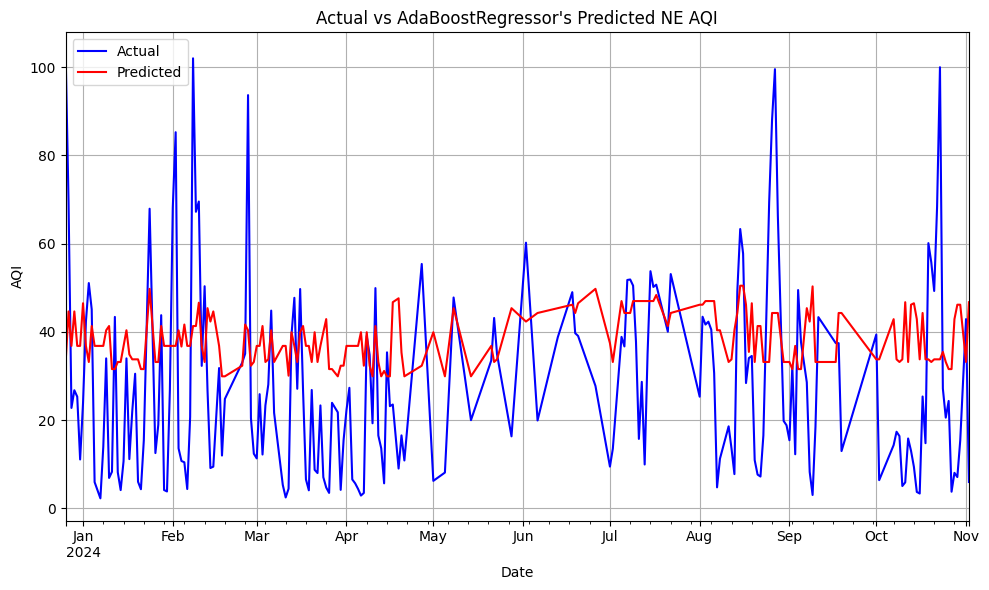

---- LA Model ----
MSE: 1329.1042415652687, R²: 0.0202655820068528


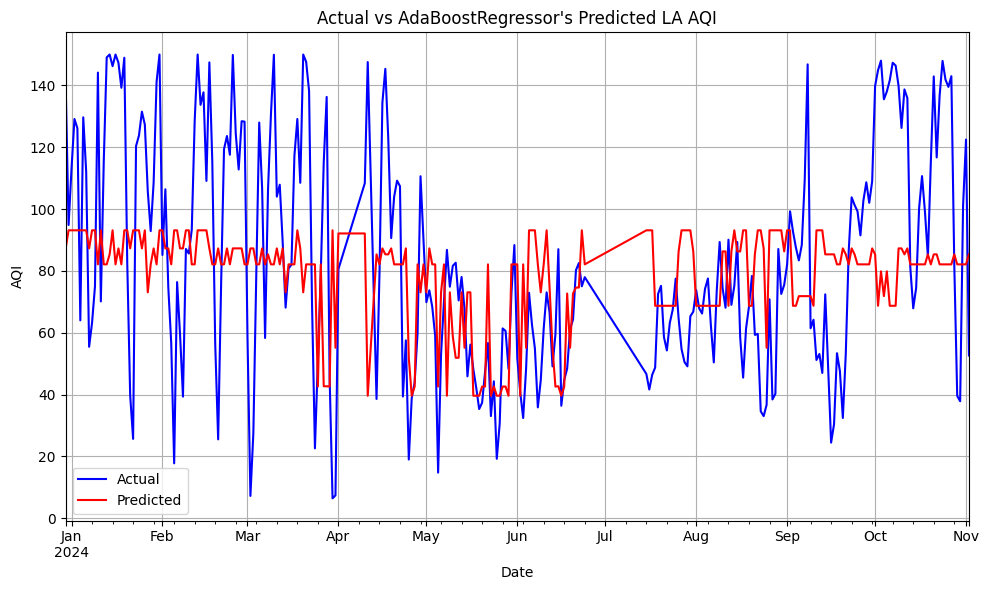

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

def train_and_evaluate_adaboost(X_train, y_train, X_test, y_test, location):
    model = AdaBoostRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    predictions = model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print(f"---- {location} Model ----")
    print(f"MSE: {mse}, R²: {r2}")

    results_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions}, index=y_test.index)
    plot_results(results_df, 'AdaBoostRegressor', location)

    return model, results_df

adab_ne_model, adab_ne_results_df = train_and_evaluate_adaboost(X_ne_train, y_ne_train, X_ne_test, y_ne_test, "NE")
adab_la_model, adab_la_results_df = train_and_evaluate_adaboost(X_la_train, y_la_train, X_la_test, y_la_test, "LA")

## LSTM
A type of recurrent neural network (RNN) designed to capture long-term dependencies in sequential data.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
16/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 3544415.7500
Epoch 1: val_loss improved from inf to 251987.03125, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 13s 117ms/step - loss: 3274236.2500 - val_loss: 251987.0312 - learning_rate: 0.0010
Epoch 2/100
19/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 1110763.6250
Epoch 2: val_loss improved from 251987.03125 to 40601.91797, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1088163.5000 - val_loss: 40601.9180 - learning_rate: 0.0010
Epoch 3/100
18/21 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 858760.4375
Epoch 3: val_loss improved from 40601.91797 to 4377.40332, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 831928.0625 - val_loss: 4377.4033 - learning_rate: 0.0010
Epoch 4/100
14/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 353225.1875  
Epoch 4: val_loss improved from 4377.40332 to 839.36316, saving model to best_model.keras
21/21 ━━━━━━━━━━━━━━━━━━

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 95000.6875 
Epoch 1: val_loss did not improve from 522.79382
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 91199.2656 - val_loss: 6049.1826 - learning_rate: 0.0010
Epoch 2/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 28110.5859
Epoch 2: val_loss did not improve from 522.79382
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 27964.9902 - val_loss: 2187.4587 - learning_rate: 0.0010
Epoch 3/200
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16430.3828
Epoch 3: val_loss did not improve from 522.79382
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 16349.1172 - val_loss: 2168.6975 - learning_rate: 0.0010
Epoch 4/200
21/28 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 12003.2529
Epoch 4: val_loss did not improve from 522.79382
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 11774.1465 - val_loss: 1912.5701 - learning_rate: 0.0010
Epoch 5/200
26/28 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 7571.8237
Epoch 5: val_loss did not improve from 522.79382

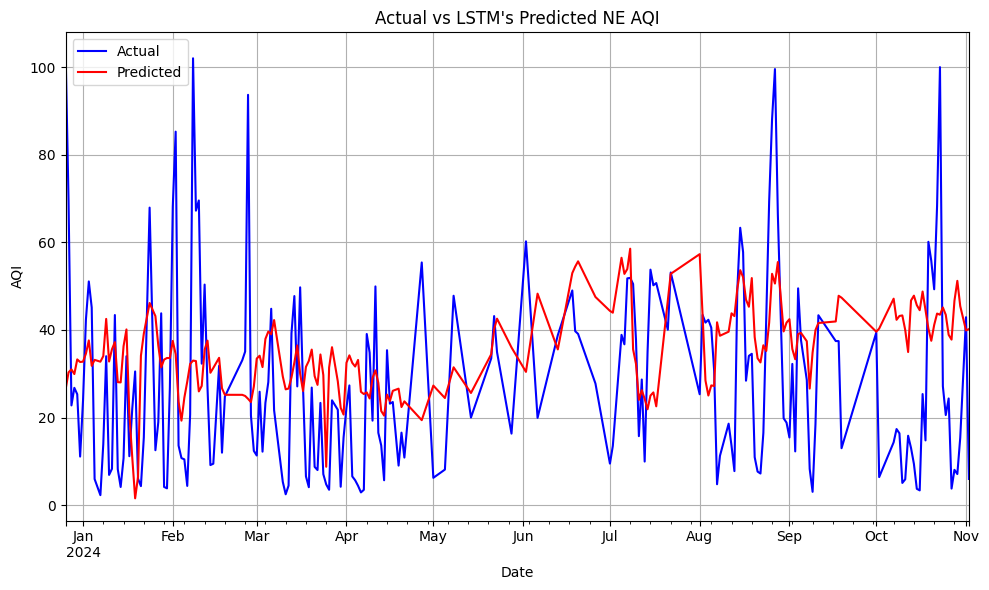

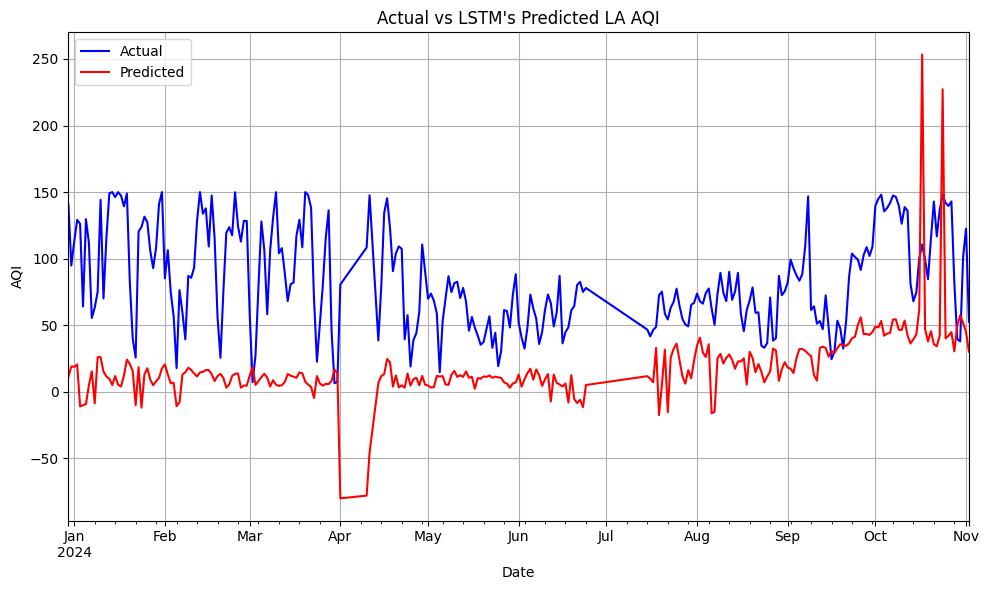

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau

def build_lstm_model(input_shape):
    model = Sequential()

    # First LSTM layer with return_sequences=True
    model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))

    # Second LSTM layer
    model.add(LSTM(50, activation='relu'))
    model.add(Dropout(0.2))

    # Dense output layer
    model.add(Dense(1))

    model.compile(optimizer='adam', loss='mse')
    return model

# Reshape data for LSTM
X_ne_train_reshaped = X_ne_train.values.reshape((X_ne_train.shape[0], 1, X_ne_train.shape[1]))
X_ne_test_reshaped = X_ne_test.values.reshape((X_ne_test.shape[0], 1, X_ne_test.shape[1]))

X_la_train_reshaped = X_la_train.values.reshape((X_la_train.shape[0], 1, X_la_train.shape[1]))
X_la_test_reshaped = X_la_test.values.reshape((X_la_test.shape[0], 1, X_la_test.shape[1]))

checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# NE model
model_ne = build_lstm_model(input_shape=(X_ne_train_reshaped.shape[1], X_ne_train_reshaped.shape[2]))
model_ne.fit(
    X_ne_train_reshaped, y_ne_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# LA model
model_la = build_lstm_model(input_shape=(X_la_train_reshaped.shape[1], X_la_train_reshaped.shape[2]))
model_la.fit(
    X_la_train_reshaped, y_la_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

# make predictions
lstm_ne_predictions = model_ne.predict(X_ne_test_reshaped)
lstm_la_predictions = model_la.predict(X_la_test_reshaped)

lstm_ne_mse = mean_squared_error(y_ne_test, lstm_ne_predictions)
lstm_ne_r2 = r2_score(y_ne_test, lstm_ne_predictions)
print("---- NE Model ----")
print(f"MSE: {lstm_ne_mse}, R²: {lstm_ne_r2}")
# print(checkpoint)
lstm_ne_results_df = pd.DataFrame({'Actual': y_ne_test, 'Predicted': lstm_ne_predictions.flatten()}, index=y_ne_test.index)

lstm_la_mse = mean_squared_error(y_la_test, lstm_la_predictions)
lstm_la_r2 = r2_score(y_la_test, lstm_la_predictions)
print("---- LA Model ----")
print(f"MSE: {lstm_la_mse}, R²: {lstm_la_r2}")
#print(checkpoint)
lstm_la_results_df = pd.DataFrame({'Actual': y_la_test, 'Predicted': lstm_la_predictions.flatten()}, index=y_la_test.index)

# plot actuval vs predicted for each NE and LA
plt.figure(figsize=(10, 6))

lstm_ne_results_df['Actual'].plot(label='Actual', color='blue')
lstm_ne_results_df['Predicted'].plot(label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs LSTM's Predicted NE AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))

lstm_la_results_df['Actual'].plot(label='Actual', color='blue')
lstm_la_results_df['Predicted'].plot(label='Predicted', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title("Actual vs LSTM's Predicted LA AQI")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    return({'mape':mape, 'me':me, 'mae': mae,
            'mpe': mpe, 'rmse':rmse, 'corr':corr})

In [ ]:
# Define models and their corresponding datasets for NE and LA
models = {
    'VectorAutoRegressor': {
        'NE': (ne_df_forecast['aqi'].values, var_ne_test['aqi']),
        'LA': (la_df_forecast['aqi'].values, var_la_test['aqi'])
    },
    'Random Forest Regressor': {
        'NE': (rfr_ne_results_df['Predicted'], rfr_ne_results_df['Actual']),
        'LA': (rfr_la_results_df['Predicted'], rfr_la_results_df['Actual'])
    },
    'XGBoostRegressor': {
        'NE': (xgb_ne_results_df['Predicted'], xgb_ne_results_df['Actual']),
        'LA': (xgb_la_results_df['Predicted'], xgb_la_results_df['Actual'])
    },
    'SVR': {
        'NE': (svr_ne_results_df['Predicted'], svr_ne_results_df['Actual']),
        'LA': (svr_la_results_df['Predicted'], svr_la_results_df['Actual'])
    },
    'MLPRegressor': {
        'NE': (mlp_ne_results_df['Predicted'], mlp_ne_results_df['Actual']),
        'LA': (mlp_la_results_df['Predicted'], mlp_la_results_df['Actual'])
    },
    'LGBMRegressor': {
        'NE': (lgbm_ne_results_df['Predicted'], lgbm_ne_results_df['Actual']),
        'LA': (lgbm_la_results_df['Predicted'], lgbm_la_results_df['Actual'])
    },
    'CatBoostRegressor': {
        'NE': (catb_ne_results_df['Predicted'], catb_ne_results_df['Actual']),
        'LA': (catb_la_results_df['Predicted'], catb_la_results_df['Actual'])
    },
    'ElasticNet': {
        'NE': (elastic_ne_results_df['Predicted'], elastic_ne_results_df['Actual']),
        'LA': (elastic_la_results_df['Predicted'], elastic_la_results_df['Actual'])
    },
    'LSTM': {
        'NE': (lstm_ne_results_df['Predicted'], lstm_ne_results_df['Actual']),
        'LA': (lstm_la_results_df['Predicted'], lstm_la_results_df['Actual'])
    },
    'AdaBoostRegressor': {
        'NE': (adab_ne_results_df['Predicted'], adab_ne_results_df['Actual']),
        'LA': (adab_la_results_df['Predicted'], adab_la_results_df['Actual'])
    }
}

# Function to compute and display forecast accuracy
def display_forecast_accuracy(model_name, region, actual, predicted):
    print(f'Forecast Accuracy of: {model_name} ({region})')
    accuracy_metrics = forecast_accuracy(predicted, actual)
    for k, v in accuracy_metrics.items():
        print(f'{k}: {round(v, 4)}')

# Loop through each model and compute accuracy for NE and LA
for model_name, regions_data in models.items():
    for region, (predicted, actual) in regions_data.items():
        display_forecast_accuracy(model_name, region, actual, predicted)


Forecast Accuracy of: VectorAutoRegressor (NE)
mape: 1.59
me: 2.1139
mae: 17.9539
mpe: 1.3227
rmse: 22.2641
corr: -0.2624
Forecast Accuracy of: VectorAutoRegressor (LA)
mape: 0.5806
me: -2.6179
mae: 30.913
mpe: 0.3201
rmse: 37.182
corr: -0.0856
Forecast Accuracy of: Random Forest Regressor (NE)
mape: 1.5224
me: 4.082
mae: 18.439
mpe: 1.2621
rmse: 23.6799
corr: 0.1474
Forecast Accuracy of: Random Forest Regressor (LA)
mape: 0.5716
me: -8.2068
mae: 33.805
mpe: 0.1944
rmse: 42.6624
corr: 0.1282
Forecast Accuracy of: XGBoostRegressor (NE)
mape: 1.5392
me: 4.3634
mae: 18.4974
mpe: 1.2844
rmse: 23.4339
corr: 0.1806
Forecast Accuracy of: XGBoostRegressor (LA)
mape: 0.5648
me: -8.9511
mae: 33.2947
mpe: 0.1871
rmse: 42.2058
corr: 0.133
Forecast Accuracy of: SVR (NE)
mape: 1.2337
me: -0.758
mae: 15.8567
mpe: 0.9347
rmse: 21.1212
corr: 0.261
Forecast Accuracy of: SVR (LA)
mape: 0.5062
me: -12.3263
mae: 32.1029
mpe: 0.1372
rmse: 40.3291
corr: 0.0794
Forecast Accuracy of: MLPRegressor (NE)
mape: 1.

In [ ]:
rfr_results_df_reset = rfr_ne_results_df.reset_index()
xg_results_df_reset = xgb_ne_results_df.reset_index()
svr_results_df_reset = svr_ne_results_df.reset_index()
mlp_results_df_reset = mlp_ne_results_df.reset_index()
lgbm_results_df_reset = lgbm_ne_results_df.reset_index()
catb_results_df_reset = catb_ne_results_df.reset_index()
elastic_results_df_reset = elastic_ne_results_df.reset_index()
lstm_results_df_reset = lstm_ne_results_df.reset_index()
adab_results_df_reset = adab_ne_results_df.reset_index()
var_results_df_reset = ne_df_forecast.reset_index()

In [ ]:
model_results_dfs =[
    rfr_results_df_reset,
    xg_results_df_reset,
    svr_results_df_reset,
    mlp_results_df_reset,
    lgbm_results_df_reset,
    catb_results_df_reset,
    elastic_results_df_reset,
    lstm_results_df_reset,
    adab_results_df_reset,
    var_results_df_reset
]

In [ ]:
print(model_results_dfs)

[         period  Actual  Predicted
0    2023-12-26  102.87    13.5947
1    2023-12-27   69.37    16.3675
2    2023-12-28   22.77    28.3002
3    2023-12-29   26.78    14.2146
4    2023-12-30   25.32    21.3786
..          ...     ...        ...
202  2024-10-28    8.06    42.4330
203  2024-10-29    7.10    40.2302
204  2024-10-30   15.38    36.2222
205  2024-11-01   42.90    37.8904
206  2024-11-02    5.98    45.5347

[207 rows x 3 columns],          period  Actual  Predicted
0    2023-12-26  102.87  15.949204
1    2023-12-27   69.37  27.241896
2    2023-12-28   22.77  29.488798
3    2023-12-29   26.78   8.268224
4    2023-12-30   25.32  23.978548
..          ...     ...        ...
202  2024-10-28    8.06  44.328342
203  2024-10-29    7.10  40.030205
204  2024-10-30   15.38  39.728691
205  2024-11-01   42.90  26.747116
206  2024-11-02    5.98  39.739208

[207 rows x 3 columns],          period  Actual  Predicted
0    2023-12-26  102.87  19.389083
1    2023-12-27   69.37  20.503250
2   

In [ ]:
model_file_names = [
    'RandomForestRegressor_NE_results.csv',
    'XGBoostRegressor_NE_results.csv',
    'SVR_NE_results.csv',
    'MLPRegressor_NE_results.csv',
    'LGBMRegressor_NE_results.csv',
    'CatBoostRegressor_NE_results.csv',
    'ElasticNet_NE_results.csv',
    'LSTM_NE_results.csv',
    'AdaBoostRegressor_NE_results.csv',
    'VectorAutoRegression_NE_results.csv'
]

In [ ]:
# export outputs as csv file
file_path = '/content/drive/My Drive/DS598_model_results/'
#left_join_df.to_csv(file_path)

for i in range(len(model_results_dfs)):
    model_results_dfs[i].to_csv(file_path + model_file_names[i])